# ATC40 - Capacity Spectrum Method

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from streng.tools.bilin import Bilin
import streng.codes.eurocodes.ec8.cls.seismic_action.spectra as spec_ec8
from streng.codes.usa.atc40.cls.nl_static_analysis.csm import CapacitySpectrumMethod
from streng.codes.usa.atc40.cls.nl_static_analysis.csm import StructureProperties
from streng.codes.usa.atc40.cls.nl_static_analysis.csm import Demand

In [2]:
bl = Bilin()
# bl.load_space_delimited(r'D:/MyBooks/TEI/RepairsExample/sapfiles/fema/PushoverCurve_modal.pushcurve', ' ')
bl.curve_ini.load_delimited(r'http://seivas.net/mkd/PushoverCurve_modal.pushcurve', ' ')

mystructure = StructureProperties(m = np.array([39.08, 39.08, 39.08]),
                                  φ = np.array([0.0483, 0.0920, 0.1217]),
                                  T0 = 0.753,
                                  pushover_curve_F = bl.curve_ini.y,
                                  pushover_curve_δ = bl.curve_ini.x,
                                  behavior ='A')

In [3]:
T_range = np.linspace(1e-10, 4, 401)

mydemand = Demand(T_range=T_range,
                  Sa=None,
                  Sd=None,
                  TC=None)

mydemand.ec8_elastic(αgR=0.24*9.81,
                          γI=1.0,
                          ground_type = 'C',
                          spectrum_type = 1,
                          η =1.0,
                          q=1.0,
                          β=0.2)

In [4]:
mycsm = CapacitySpectrumMethod(structure = mystructure,
                               demand = mydemand,
                               first_try_case = 'intersection')

In [5]:
print(f'PF1 = {mycsm.structure.PF1:.4f}')
print(f'α1 = {mycsm.structure.α1:.4f}')
print(f'φroof1 = {mycsm.structure.φroof1:.4f}')

PF1 = 10.2313
α1 = 0.8935
φroof1 = 0.1217


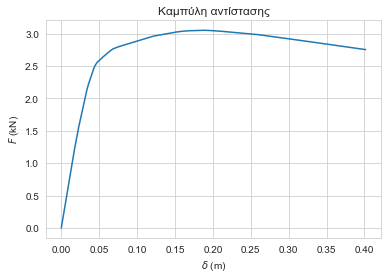

In [6]:
plt.plot(mycsm.structure.Sd, mycsm.structure.Sa)
plt.ylabel('$F$ (kN)') 
plt.xlabel('$δ$ (m)') #'μθpl'  
plt.title('Καμπύλη αντίστασης')
plt.show()

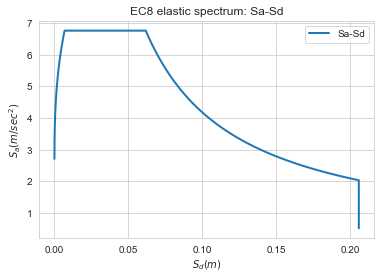

In [7]:
plt.plot(mycsm.demand.Sd, mycsm.demand.Sa, lw=2, label='Sa-Sd')
plt.ylabel('$S_{a} (m/sec^2)$') 
plt.xlabel('$S_{d} (m)$') 
plt.title('EC8 elastic spectrum: Sa-Sd')
plt.legend()
plt.show()

In [8]:
print(mycsm.Sd_first_try)

0.13938832648876784


In [9]:
mycsm.calc_performance_point()

solution: Sd = 0.0602m


In [10]:
print(mycsm.output.to_markdown)

|   __iteration |        Sd |     error |
|--------------:|----------:|----------:|
|             0 | 1.394E-01 |           |
|             1 | 4.362E-02 | 6.871E-01 |
|             2 | 8.555E-02 | 9.613E-01 |
|             3 | 4.935E-02 | 4.231E-01 |
|             4 | 7.295E-02 | 4.782E-01 |
|             5 | 5.353E-02 | 2.662E-01 |
|             6 | 6.627E-02 | 2.379E-01 |
|             7 | 5.675E-02 | 1.437E-01 |
|             8 | 6.270E-02 | 1.049E-01 |
|             9 | 5.864E-02 | 6.475E-02 |
|            10 | 6.121E-02 | 4.377E-02 |
|            11 | 5.950E-02 | 2.792E-02 |
|            12 | 6.060E-02 | 1.849E-02 |
|            13 | 5.987E-02 | 1.195E-02 |
|            14 | 6.034E-02 | 7.845E-03 |
|            15 | 6.004E-02 | 5.097E-03 |
|            16 | 6.024E-02 | 3.327E-03 |
|            17 | 6.011E-02 | 2.163E-03 |
|            18 | 6.019E-02 | 1.409E-03 |
|            19 | 6.013E-02 | 9.161E-04 |
|            20 | 6.017E-02 | 5.964E-04 |
|            21 | 6.015E-02 | 3.88

In [11]:
mycsm.first_try_case = 'equal displacements'

In [12]:
mycsm.calc_performance_point()

solution: Sd = 0.0602m


In [13]:
mycsm.output.to_panda_dataframe

,__iteration,Sd,error
0,0,0.077466,NaN
1,1,0.051766,0.331765
2,2,0.068702,0.327165
3,3,0.055599,0.190713
4,4,0.063828,0.148007
5,5,0.058016,0.091057
6,6,0.061673,0.063023
7,7,0.059221,0.039762
8,8,0.060791,0.026514
9,9,0.059753,0.017068
